In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")


In [2]:
df=pd.read_csv("C:\\Users\\Nitin\\Downloads\\data sets\\titanic\\train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
## survied should be of object category 

In [7]:
for i in df.columns:
    if df[i].isnull().any():
        print(i,"------",df[i].isnull().sum()*100/df.shape[0],"%")

Age ------ 19.865319865319865 %
Cabin ------ 77.10437710437711 %
Embarked ------ 0.2244668911335578 %


In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Age'>

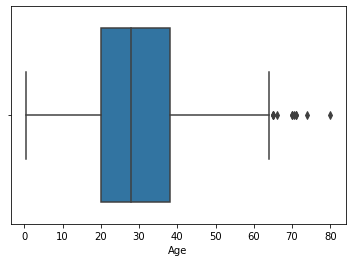

In [11]:
sns.boxplot(df["Age"])

In [12]:
## filling cabin and embarked with mode 
l = ["Cabin","Embarked"]
for i in l:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [13]:
## As age has outliers we are filling it with median
df["Age"].fillna(df["Age"].median(),inplace=True)

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
## etching unique values of full data 
for i in df.columns:
    print(i,"has",df[i].nunique(),"------",df[i].unique())

PassengerId has 891 ------ [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240

In [17]:
df.drop(columns=["PassengerId","Ticket"],inplace=True)

In [18]:
df.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
699,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,7.650,F G63,S
716,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,227.525,C45,C
597,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,0.000,B96 B98,S
567,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.075,B96 B98,S
736,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,34.375,B96 B98,S


In [19]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [20]:
df.describe().T ## for numeric getting statistical data 

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [21]:
### age and fare has outliers

In [22]:
df.corr() ## it shows realtion betwwen 2 variables 

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


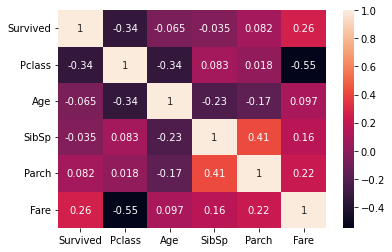

In [23]:
sns.heatmap(df.corr(),annot=True);  ## there is no strong correlation betwwen 2 class but there is moderate correlation which is valid 

In [24]:
## changing dtype of survived and pclass to object as they were in interger
l=["Survived","Pclass"]
for i in l:
    df[i]=df[i].astype("object")

In [25]:
## fetching categorical datatyes
df.select_dtypes(include="object") ## All object datatypes columns 

,Survived,Pclass,Name,Sex,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,B96 B98,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,B96 B98,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,C123,S
4,0,3,"Allen, Mr. William Henry",male,B96 B98,S
...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,B96 B98,S
887,1,1,"Graham, Miss. Margaret Edith",female,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,B96 B98,S
889,1,1,"Behr, Mr. Karl Howell",male,C148,C


In [26]:
object_columns=df.select_dtypes(include="object").columns
object_columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Cabin', 'Embarked'], dtype='object')

In [27]:
## how many passengers survived
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

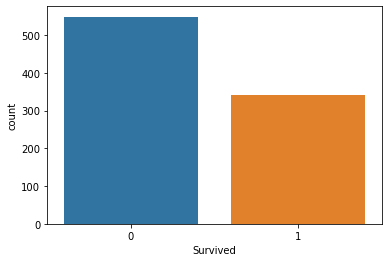

In [28]:
sns.countplot(x="Survived",data=df) ### how many survided are in 1

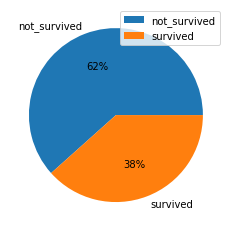

In [29]:
#l=data["Survived"].unique()
l1=["not_survived","survived"]
l=list(df["Survived"].value_counts())
l
plt.pie(l,labels=l1,autopct="%0.0f%%");
plt.legend()




In [30]:
## univariate analysis -  how many passenegers in each class
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

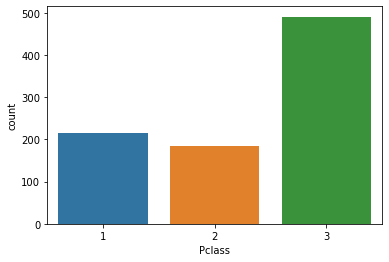

In [31]:
sns.countplot(x="Pclass",data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

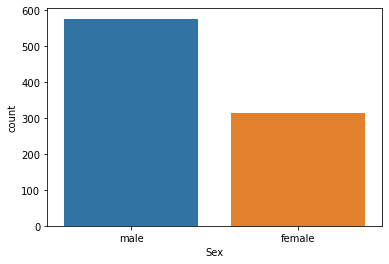

In [32]:
sns.countplot(x="Sex",data=df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

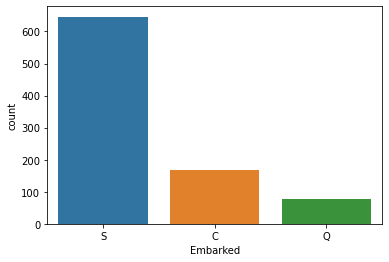

In [33]:
sns.countplot(x="Embarked",data=df)

In [34]:
df["Cabin"].unique() ### we will use feature engeneering separating ABCDE 

array(['B96 B98', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [35]:
df["Cabin_name"]=df["Cabin"].apply(lambda x:x[0])

In [36]:
df["Cabin_name"]

0      B
1      C
2      B
3      C
4      B
      ..
886    B
887    B
888    B
889    C
890    B
Name: Cabin_name, Length: 891, dtype: object

In [37]:
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_name
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,B96 B98,S,B
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,C


<AxesSubplot:xlabel='Cabin_name', ylabel='count'>

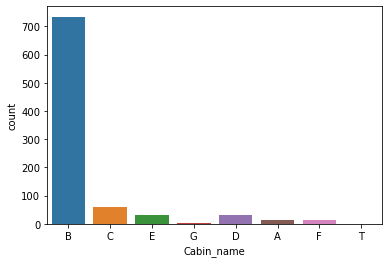

In [38]:
sns.countplot(x="Cabin_name",data=df)

In [39]:
df["Name"].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [40]:
df["salutation"]=df["Name"].str.split(",",expand=True)[1].str.split(".",expand=True)[0]  ##Series.str.split(pat=None, *, n=- 1, expand=False, regex=None)[source]  ,Expand  means  split strings into separate columns.
df.head()
df["salutation"].unique()


array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

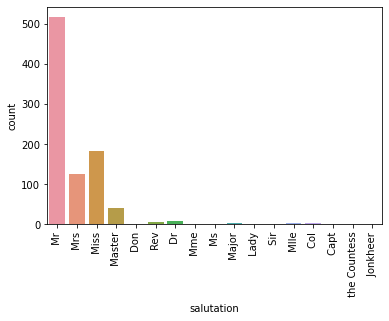

In [41]:
sns.countplot(x="salutation",data=df)
plt.xticks(rotation=90);

In [42]:
numeric=["float","int"]
df.select_dtypes(include=numeric).columns


Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

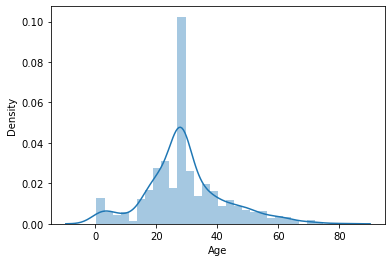

In [43]:
sns.distplot(df["Age"]); ## it is right skewed

In [44]:
df["Age"].skew() ## right skewed

0.5102446555756495

In [45]:
## distributing the age into different
## which age groups passenegrs travel most 
df["Age_category"] = pd.cut(df.Age, [0,14,25,60, np.inf], labels=['children','youth','adults',"senior_citizens"])

In [46]:
df["Age_category"].value_counts()

adults             568
youth              224
children            77
senior_citizens     22
Name: Age_category, dtype: int64

<AxesSubplot:xlabel='Age_category', ylabel='count'>

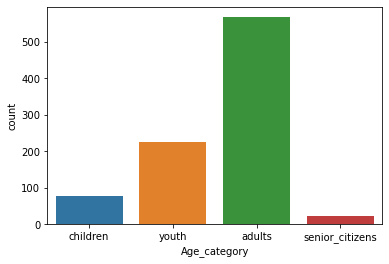

In [47]:
sns.countplot(x="Age_category",data=df)

In [48]:
df["family_members"]=df["Parch"]+df["SibSp"]  ## feature engineering (extracted new feature )
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_name,salutation,Age_category,family_members
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,B96 B98,S,B,Mr,youth,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,C,Mrs,adults,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,B96 B98,S,B,Miss,adults,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,C,Mrs,adults,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,B96 B98,S,B,Mr,adults,0


In [49]:
df["family_members"].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

<AxesSubplot:xlabel='family_members', ylabel='count'>

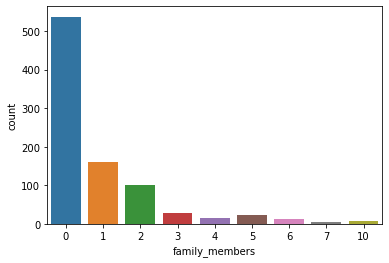

In [50]:
sns.countplot(x="family_members",data=df) ### singles travel most 

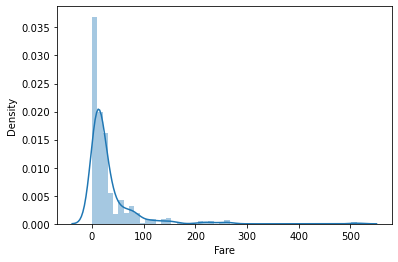

In [51]:
sns.distplot(df["Fare"]);

<AxesSubplot:xlabel='Age'>

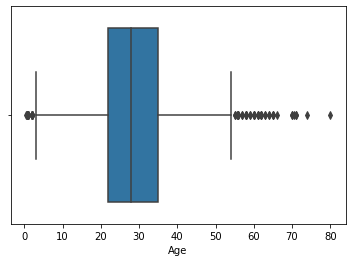

In [52]:
sns.boxplot(df["Age"])

In [53]:
df["Fare"].agg(["mean","min","max"])

mean     32.204208
min       0.000000
max     512.329200
Name: Fare, dtype: float64

In [54]:
df[df["Fare"]==0]  ### checking who travelled with 0 fare

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_name,salutation,Age_category,family_members
179,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,0.0,B96 B98,S,B,Mr,adults,0
263,0,1,"Harrison, Mr. William",male,40.0,0,0,0.0,B94,S,B,Mr,adults,0
271,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,0.0,B96 B98,S,B,Mr,youth,0
277,0,2,"Parkes, Mr. Francis ""Frank""",male,28.0,0,0,0.0,B96 B98,S,B,Mr,adults,0
302,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,0.0,B96 B98,S,B,Mr,youth,0
413,0,2,"Cunningham, Mr. Alfred Fleming",male,28.0,0,0,0.0,B96 B98,S,B,Mr,adults,0
466,0,2,"Campbell, Mr. William",male,28.0,0,0,0.0,B96 B98,S,B,Mr,adults,0
481,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,28.0,0,0,0.0,B96 B98,S,B,Mr,adults,0
597,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,0.0,B96 B98,S,B,Mr,adults,0
633,0,1,"Parr, Mr. William Henry Marsh",male,28.0,0,0,0.0,B96 B98,S,B,Mr,adults,0


In [55]:
l=[179,271,277,302,413,466,481,597,633,674,732,806,815,822]
for i in l:
    df["Fare"].iloc[i]=df["Fare"].mean()

In [56]:
df["Fare"].agg(["mean","min","max"])

mean     32.713931
min       0.000000
max     512.329200
Name: Fare, dtype: float64

In [58]:
### find out the avg age of the passengers who were died = seaborn barplot groupby
df.groupby("Survived")["Age"].agg(["mean"])

,mean
Survived,
0,30.028233
1,28.291433


<AxesSubplot:xlabel='Survived', ylabel='Age'>

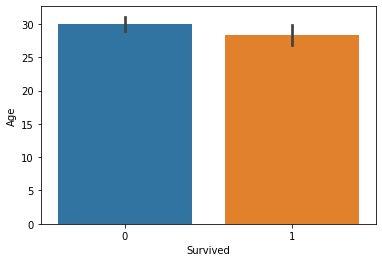

In [59]:
sns.barplot(x="Survived",y="Age",data=df) ### as it gives default mean 

In [60]:
## find the avg fare spend by survived or not survived
df.groupby("Survived")["Fare"].agg(["mean"])

,mean
Survived,
0,22.886416
1,48.489678


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

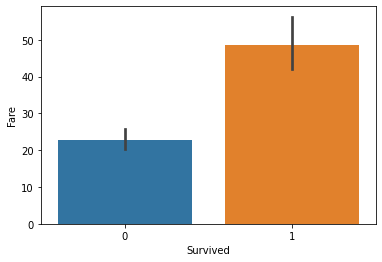

In [61]:
sns.barplot(x="Survived",y="Fare",data=df)

In [62]:
## how many male or female survived of each class
df.groupby(["Survived","Pclass"])["Sex"].value_counts()

Survived  Pclass  Sex   
0         1       male       77
                  female      3
          2       male       91
                  female      6
          3       male      300
                  female     72
1         1       female     91
                  male       45
          2       female     70
                  male       17
          3       female     72
                  male       47
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Pclass'>

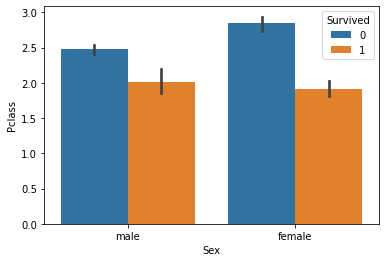

In [63]:
sns.barplot(x="Sex",y="Pclass",hue="Survived",data=df)

In [64]:
##of which embarked passengers died more
df.groupby("Survived")["Embarked"].value_counts()

Survived  Embarked
0         S           427
          C            75
          Q            47
1         S           219
          C            93
          Q            30
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

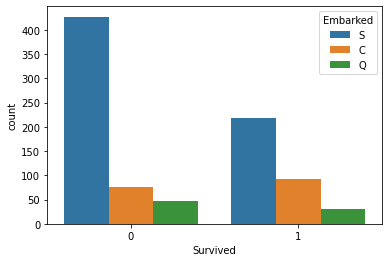

In [65]:
sns.countplot(x="Survived",hue="Embarked",data=df)

In [66]:
## married women survived or single women survivde most
df.sample(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_name,salutation,Age_category,family_members
183,1,2,"Becker, Master. Richard F",male,1.0,2,1,39.0000,F4,S,F,Master,children,3
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,B96 B98,S,B,Mrs,adults,2


In [67]:
df.groupby("Survived")["salutation"].value_counts()

Survived  salutation   
0          Mr              436
           Miss             55
           Mrs              26
           Master           17
           Rev               6
           Dr                4
           Capt              1
           Col               1
           Don               1
           Jonkheer          1
           Major             1
1          Miss            127
           Mrs              99
           Mr               81
           Master           23
           Dr                3
           Mlle              2
           Col               1
           Lady              1
           Major             1
           Mme               1
           Ms                1
           Sir               1
           the Countess      1
Name: salutation, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

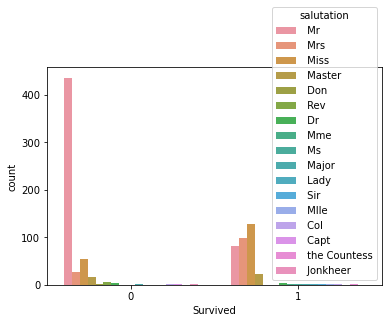

In [68]:
sns.countplot(x="Survived",hue="salutation",data=df)

In [69]:
## of which cabin passengers survived most
df.groupby("Survived")["Cabin_name"].value_counts()

Survived  Cabin_name
0         B             493
          C              24
          A               8
          D               8
          E               8
          F               5
          G               2
          T               1
1         B             241
          C              35
          D              25
          E              24
          F               8
          A               7
          G               2
Name: Cabin_name, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

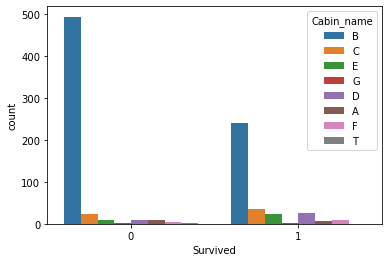

In [70]:
sns.countplot(x="Survived",hue="Cabin_name",data=df)

In [71]:
## how many male and female survived or not survived
df.groupby("Sex")["Survived"].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

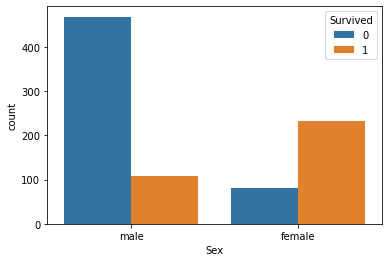

In [72]:
sns.countplot(x="Sex",hue="Survived",data=df)

In [73]:
## of which class passenegers survivved or not survived more
df.groupby("Survived")["Pclass"].value_counts()

Survived  Pclass
0         3         372
          2          97
          1          80
1         1         136
          3         119
          2          87
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

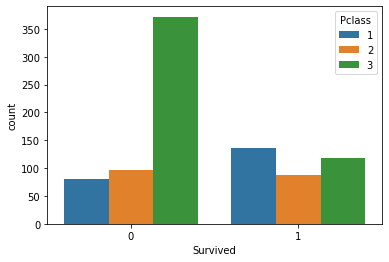

In [74]:
sns.countplot(x="Survived",hue="Pclass",data=df)

In [75]:
## of which category of age passengers survivded most
df.groupby("Survived")["Age_category"].value_counts()

Survived                 
0         adults             355
          youth              145
          children            32
          senior_citizens     17
1         adults             213
          youth               79
          children            45
          senior_citizens      5
Name: Age_category, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

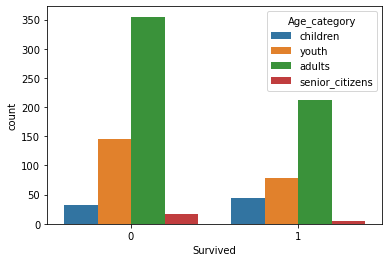

In [76]:
sns.countplot(x="Survived",hue="Age_category",data=df)

In [77]:
## find out the avg fare spend by male and female of different embarked port
df.groupby(["Sex","Embarked"])["Fare"].agg(["mean"])

mean
Sex    Embarked           
female C         75.169805
       Q         12.634958
       S         39.143456
male   C         48.262109
       Q         13.838922
       S         22.741844

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

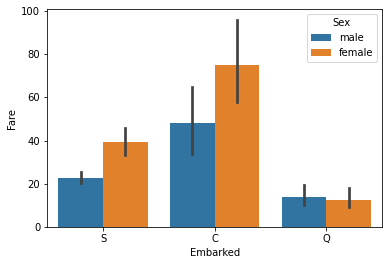

In [78]:
sns.barplot(x="Embarked",y="Fare",hue="Sex",data=df)

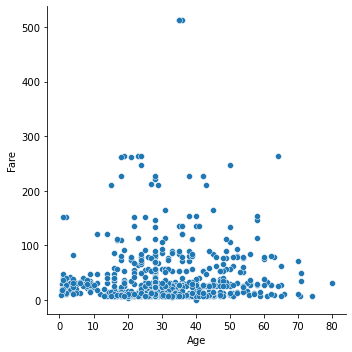

In [80]:
## how fare is related with age 
sns.relplot(x="Age",y="Fare",data=df)

In [81]:
## find out the comparison of the passengers age with respect to survived or not survived
df.groupby("Survived")["Age"].value_counts()

Survived  Age 
0         28.0    143
          21.0     19
          18.0     17
          25.0     17
          19.0     16
                 ... 
1         43.0      1
          47.0      1
          53.0      1
          55.0      1
          80.0      1
Name: Age, Length: 142, dtype: int64

In [87]:
Age_s=df[df["Survived"]==1]["Age"]

In [88]:
Age_ns=df[df["Survived"]==0]["Age"]

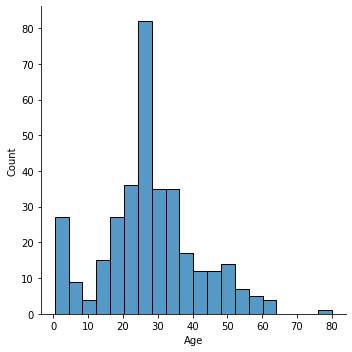

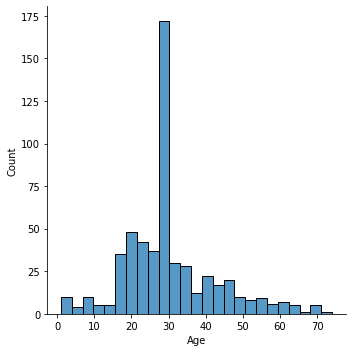

In [91]:
sns.displot(Age_s,label="Survived")
sns.displot(Age_ns,label="Not Survived")

In [92]:
## find the avg age of male and female of each class 
df.groupby("Pclass")["Age"].mean()

Pclass
1    36.812130
2    29.765380
3    25.932627
Name: Age, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

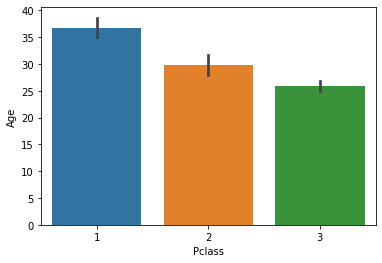

In [93]:
sns.barplot(x="Pclass",y="Age",data=df)

In [95]:
## find the avg age of male and female 
df.groupby("Sex")["Age"].mean()

Sex
female    27.929936
male      30.140676
Name: Age, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='Age'>

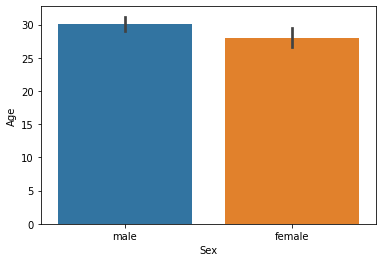

In [96]:
sns.barplot(x="Sex",y="Age",data=df)